# Using Linear Regression to predict the student's percentage based on their studying hours

In [40]:
# Importing necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [41]:
# Reading the dataset 

df = pd.read_csv("student.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### In the given dataset, we are having 2 columns only named Hours and Scores

In [42]:
# Checking the dataset info or other mathematical details 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### From the above information, we can say that, there are 25 values in the 
### dataset and there are no missing values.

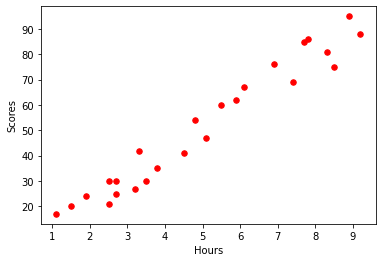

In [43]:
# Visualizing the dataset 

plt.scatter(df["Hours"],df["Scores"],color="red",s=30)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

### From the above graph, we can say that as the number of hours are increasing there is a linear growth in the scores of the students as well. So, this can be best suited for the linear regression model.

### Here, first we need to split the data into training and testing sets. We train the model on the training dataset and predict this model to predict values on the testing dataset to calculate the accuracy

In [44]:
# Importing the necessary libraries

from sklearn.model_selection import train_test_split 
X = df[["Hours"]]   # independent feactures
Y= df["Scores"]      # dependent feactures
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)   # 4 dataframes as output

In [45]:
# printing the shape of all the splitted datasets

print("Training independent dataset size: ",X_train.shape) # 1 feacture 20 rows(Hours)
print("Training dependent dataset size: ",y_train.shape) # 1 output 
print("Testing independent dataset size: ",X_test.shape) # 1 feacture 5 rows
print("Testing dependent dataset size: ",y_test.shape) # 1 output 5 feactures

Training independent dataset size:  (20, 1)
Training dependent dataset size:  (20,)
Testing independent dataset size:  (5, 1)
Testing dependent dataset size:  (5,)


### Using the LinearRegression class to pass the data to the model

In [46]:
# Importing the LinearRegression model 

from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_train, y_train)

print("Slope: ",model1.coef_[0])
print("Intercept: ",model1.intercept_)

Slope:  9.910656480642233
Intercept:  2.0181600414346974


In [47]:
# predicting the score values of the test data 

pred_y = model1.predict(X_test)
print(pred_y)
print(y_test)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]
5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64


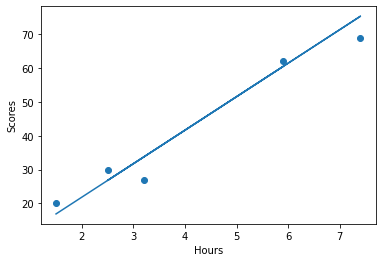

In [48]:
# Plotting the graph 

plt.scatter(X_test,y_test)
plt.plot(X_test,pred_y)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

### Creating a dataframe to see the actual and predicted scores of the student

In [49]:
df_pred = pd.DataFrame({"Actual":pred_y,"Predicted":y_test})
df_pred

,Actual,Predicted
5,16.884145,20
2,33.732261,27
19,75.357018,69
16,26.794801,30
11,60.491033,62


In [50]:
type(y_test)

pandas.core.series.Series

In [51]:
from sklearn.metrics import r2_score

score = r2_score(pred_y, y_test)
score

0.9546785947197246

### Now predicting the scores of the student whose study hours is 9.25 as given in the question

In [52]:
# Predicting the score of the student
%matplotlib inline
hours = 9.25
score = model1.predict([[hours]])
print("Hours: ",hours)
print("Score: ",score[0])

Hours:  9.25
Score:  93.69173248737535


In [57]:
import pickle
with open('demo.pkl','wb') as file:
    pickle.dump(model1,file)

In [63]:
#import demo

fil = open("demo.pkl","rb")

model2 = pickle.load(fil)


In [64]:
model2.predict([[10.25]])[0]

103.60238896801759